# Machine Learning Assignment

# **NBA Rookies**

**Dataset CSV file:** nba_logreg.csv

**Group No.:** 18

**Group Members:**

1. VARINDER SINGH  - 2021fc04070@wilp.bits-pilani.ac.in

2. BANDARU RAJA SEKHAR  - 2021fc04074@wilp.bits-pilani.ac.in

3. MIKHIL. P.A.  - 2021fc04326@wilp.bits-pilani.ac.in

## Import libraries

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Reading Dataset

In [98]:
NBA_dataset = pd.read_csv("nba_logreg.csv")

In [99]:
NBA_dataset.shape

(1340, 21)

In [100]:
NBA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1331 non-null   float64
 2   MIN          1336 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1328 non-null   float64
 13  OREB         1336 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1337 non-null   float64
 17  STL          1337 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

# Data Visualization and Exploration

### Handling Duplicates

In [101]:
NBA_dataset = NBA_dataset.drop_duplicates(subset='Name', keep='last')
NBA_dataset.reset_index(inplace = True, drop = True)

In [102]:
NBA_dataset.shape

(1294, 21)

In [103]:
print("Number of Duplicates after processing the dataset: ",NBA_dataset.duplicated().sum())

Number of Duplicates after processing the dataset:  0


### Printing 2 rows for sanity check

In [104]:
NBA_dataset.head(2)

Name 
 GP 
 MIN 
 PTS 
 FGM 
 FGA 
 FG% 
 3P Made 
 3PA 
 3P% 
 ... 
 FTA 
 FT% 
 OREB 
 DREB 
 REB 
 AST 
 STL 
 BLK 
 TOV 
 TARGET_5Yrs 
 
 
 
 
 0 
 Brandon Ingram 
 NaN 
 27.4 
 7.4 
 2.6 
 7.6 
 34.7 
 0.5 
 2.1 
 25.0 
 ... 
 2.3 
 69.9 
 0.7 
 3.4 
 4.1 
 1.9 
 0.4 
 0.4 
 1.3 
 0 
 
 
 1 
 Andrew Harrison 
 35.0 
 26.9 
 7.2 
 2.0 
 6.7 
 29.6 
 0.7 
 2.8 
 23.5 
 ... 
 3.4 
 76.5 
 0.5 
 2.0 
 2.4 
 3.7 
 1.1 
 0.5 
 1.6 
 0 
 
 
 
 2 rows × 21 columns

In [105]:
#Removing Name column
NBA_dataset = NBA_dataset.loc[ :, NBA_dataset.columns != 'Name' ]

### Visualization on Class imbalance

Minority class(0) is ~37%, so the class imbalance is mild. This slight imbalance is often not a concern, and the problem can often be treated like a normal classification predictive modeling problem. Therefore, we will not take any action.

In [106]:
NBA_dataset.shape

(1294, 20)

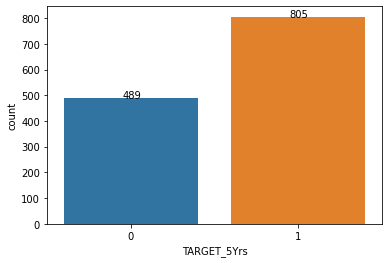

In [107]:
plt.figure(figsize=(6, 4))
ax = sns.countplot( x="TARGET_5Yrs", data=NBA_dataset )

for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.05))

### Scatter Matrix

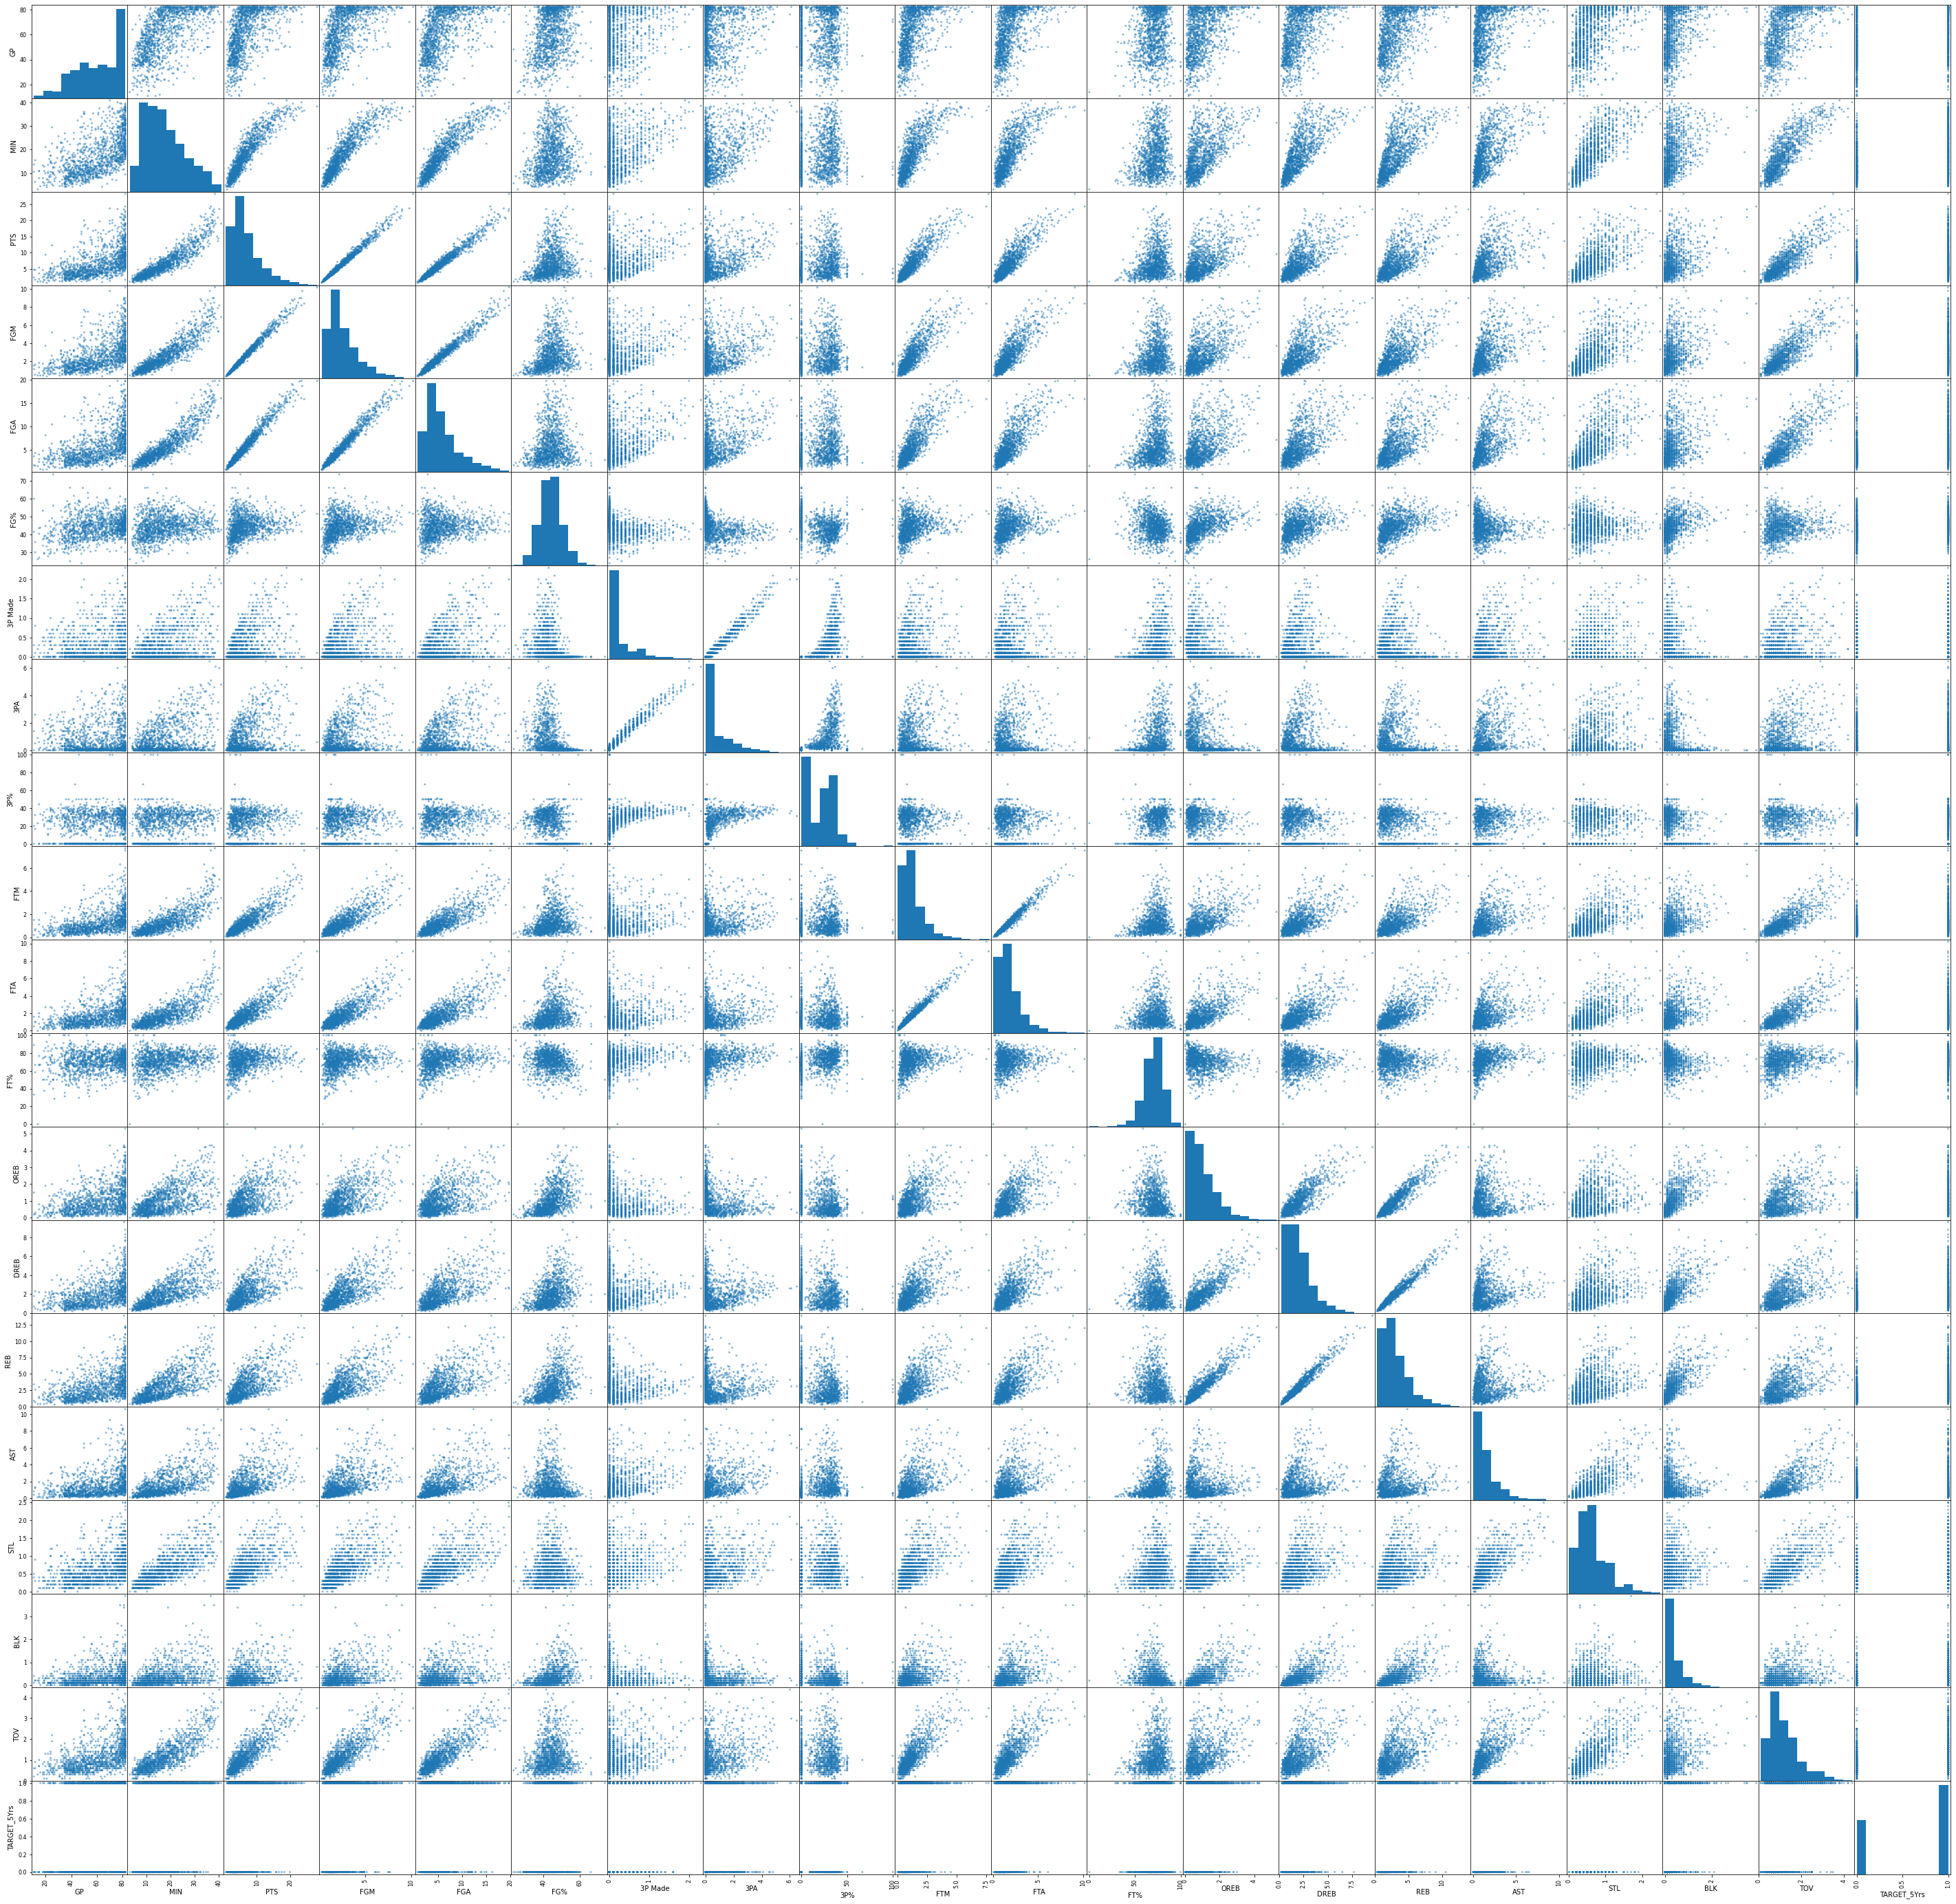

In [108]:
from pandas.plotting import scatter_matrix
scatter_matrix(NBA_dataset, figsize=(50, 50))
plt.show()

### Correlational Analysis

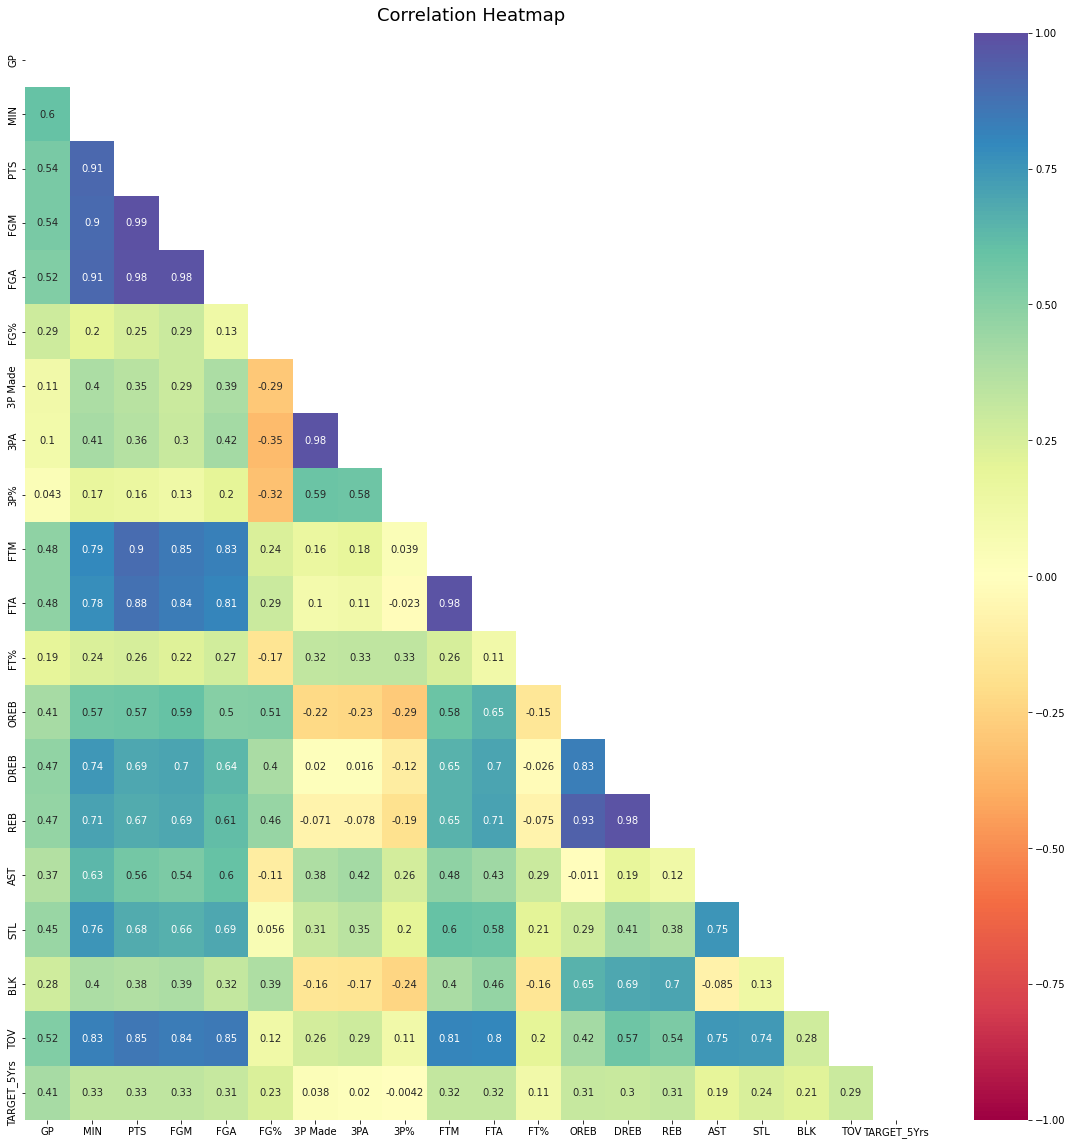

In [109]:
corr = NBA_dataset.corr()

plt.figure(figsize=(20, 20))
mask = np.triu( np.ones_like(corr) )
hm = sns.heatmap( corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='Spectral' )
hm.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

Following are the pairs having correlation more than 0.9(>0.9)

1. PTS-MIN
2. FGM-MIN
3. FGA-MIN
4. FGM-PTS
5. FGA-PTS
6. FGA-FGM
7. FTM-PTS
8. 3PA-3P Made
9. FTA-FTM
10. REB-OREB
11. REB-DREB

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features. Hence, on analysis, we will be removing the following columns:

1. MIN
2. PTS
3. REB
4. 3P Made
5. FGM
6. FTM

In [110]:
NBA_dataset = NBA_dataset.drop(['MIN','PTS','REB','3P Made','FGM','FTM'], axis = 1)

In [111]:
NBA_dataset

GP 
 FGA 
 FG% 
 3PA 
 3P% 
 FTA 
 FT% 
 OREB 
 DREB 
 AST 
 STL 
 BLK 
 TOV 
 TARGET_5Yrs 
 
 
 
 
 0 
 NaN 
 7.6 
 34.7 
 2.1 
 25.0 
 2.3 
 69.9 
 0.7 
 3.4 
 1.9 
 0.4 
 0.4 
 1.3 
 0 
 
 
 1 
 35.0 
 6.7 
 29.6 
 2.8 
 23.5 
 3.4 
 76.5 
 0.5 
 2.0 
 3.7 
 1.1 
 0.5 
 1.6 
 0 
 
 
 2 
 74.0 
 4.7 
 42.2 
 1.7 
 24.4 
 1.3 
 67.0 
 0.5 
 1.7 
 1.0 
 0.5 
 0.3 
 1.0 
 0 
 
 
 3 
 58.0 
 5.5 
 42.6 
 0.5 
 22.6 
 1.3 
 68.9 
 1.0 
 0.9 
 0.8 
 0.6 
 0.1 
 1.0 
 1 
 
 
 4 
 48.0 
 3.0 
 52.4 
 0.1 
 0.0 
 1.9 
 67.4 
 1.0 
 1.5 
 0.3 
 0.3 
 0.4 
 0.8 
 1 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1289 
 80.0 
 3.6 
 43.3 
 0.2 
 14.3 
 1.5 
 79.2 
 0.4 
 0.8 
 2.5 
 0.6 
 0.2 
 0.8 
 0 
 
 
 1290 
 68.0 
 4.1 
 35.8 
 0.7 
 16.7 
 1.0 
 79.4 
 0.4 
 1.1 
 2.3 
 0.8 
 0.0 
 1.3 
 1 
 
 
 1291 
 43.0 
 3.9 
 55.0 
 0.0 
 0.0 
 1.6 
 64.3 
 1.5 
 2.3 
 0.3 
 0.3 
 0.4 
 0.9 
 0 
 
 
 1292 
 52.0 
 3.8 
 43.9 
 0.2 
 10.0 
 1.8 
 62.5 
 0.2 
 0.4 
 2.2 
 0.4 
 0.1 
 0.8 
 1 
 
 
 1293 
 47.0 
 4.4 
 36.9 
 1.3 
 33.3 
 1.0 
 67.3 
 0.2 
 0.7 
 1.4 
 0.7 
 0.1 
 0.9 
 1 
 
 
 
 1294 rows × 14 columns

# Data Pre-processing and cleaning

In [112]:
#Dataset Information before Data pre-processing
NBA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           1286 non-null   float64
 1   FGA          1294 non-null   float64
 2   FG%          1294 non-null   float64
 3   3PA          1294 non-null   float64
 4   3P%          1284 non-null   float64
 5   FTA          1294 non-null   float64
 6   FT%          1284 non-null   float64
 7   OREB         1290 non-null   float64
 8   DREB         1294 non-null   float64
 9   AST          1291 non-null   float64
 10  STL          1292 non-null   float64
 11  BLK          1294 non-null   float64
 12  TOV          1294 non-null   float64
 13  TARGET_5Yrs  1294 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 141.7 KB


Replacing the NULL values present in columns of NBA_dataset with mean(average) value of their respective columns. <br>
Columns which are having NULL values are as follows:
1. GP
2. 3P%
3. FT%
4. OREB
5. AST
6. STL

In [113]:
# NaN values being replaced by the mean value of the column

NBA_dataset['GP'] = NBA_dataset['GP'].fillna(NBA_dataset['GP'].mean())
NBA_dataset['3P%'] = NBA_dataset['3P%'].fillna(NBA_dataset['3P%'].mean())
NBA_dataset['FT%'] = NBA_dataset['FT%'].fillna(NBA_dataset['FT%'].mean())
NBA_dataset['OREB'] = NBA_dataset['OREB'].fillna(NBA_dataset['OREB'].mean())
NBA_dataset['AST'] = NBA_dataset['AST'].fillna(NBA_dataset['AST'].mean())
NBA_dataset['STL'] = NBA_dataset['STL'].fillna(NBA_dataset['STL'].mean())

In [114]:
#Dataset Information after Data pre-processing
NBA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           1294 non-null   float64
 1   FGA          1294 non-null   float64
 2   FG%          1294 non-null   float64
 3   3PA          1294 non-null   float64
 4   3P%          1294 non-null   float64
 5   FTA          1294 non-null   float64
 6   FT%          1294 non-null   float64
 7   OREB         1294 non-null   float64
 8   DREB         1294 non-null   float64
 9   AST          1294 non-null   float64
 10  STL          1294 non-null   float64
 11  BLK          1294 non-null   float64
 12  TOV          1294 non-null   float64
 13  TARGET_5Yrs  1294 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 141.7 KB


In [115]:
# Columns of dataset

col = ['GP','FGA','FG%','3PA','3P%','FTA','FT%','OREB','DREB','AST','STL','BLK','TOV','TARGET_5Yrs']

## Checking Data Distribution and Outlier Analysis on dataset

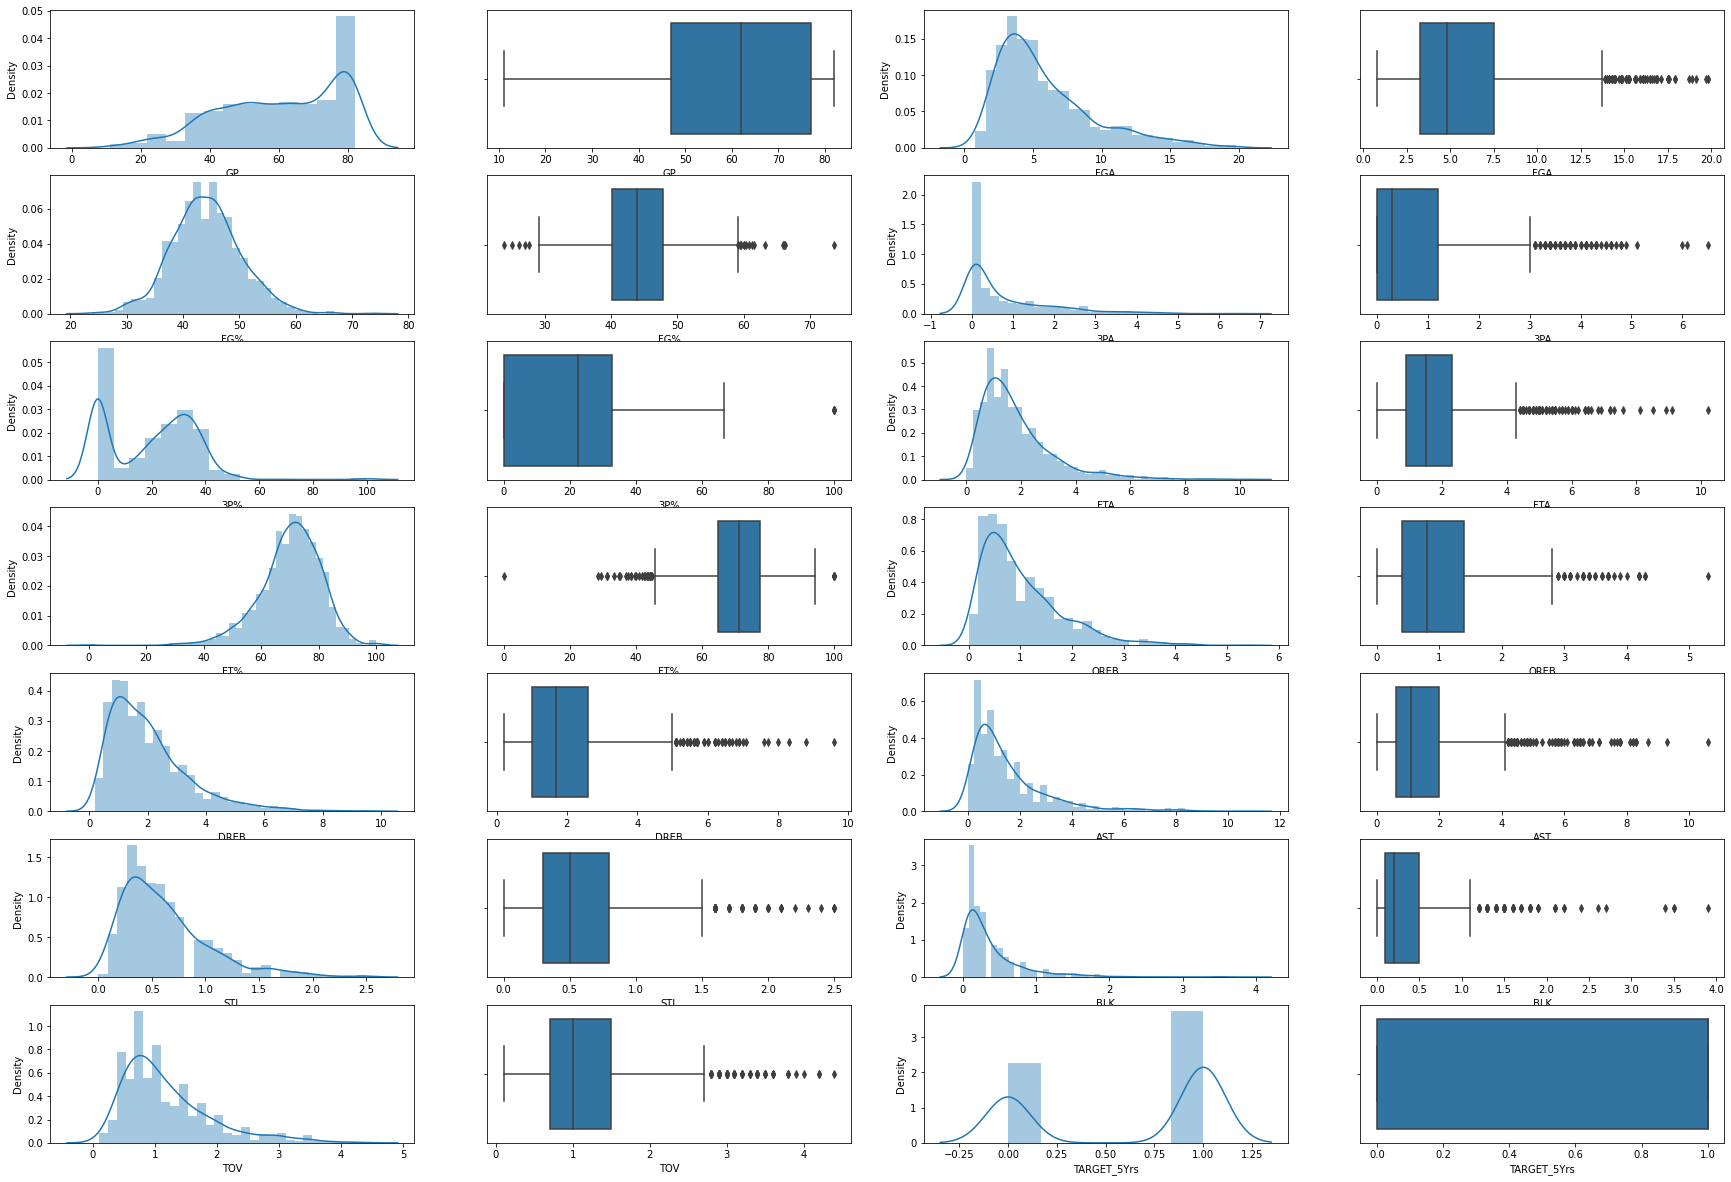

In [116]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(30,30))
num = 1
for i in col:
    plt.subplot(10,4,num)
    sns.distplot(NBA_dataset[str(i)])
    num = num + 1
    plt.subplot(10,4,num)
    sns.boxplot(NBA_dataset[str(i)])
    num = num + 1

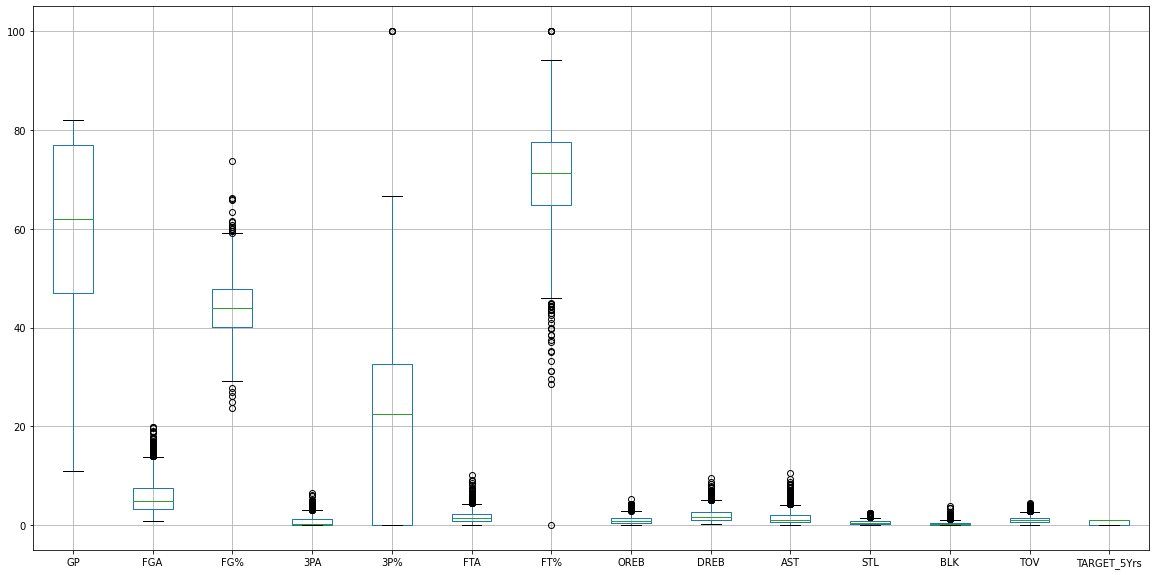

In [117]:
NBA_dataset.boxplot(figsize = (20,10), column = col)

## Handling the Outliers 

**Winsorization of Outliers** is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data. 

In [118]:

for i in col:
    percentile25 = NBA_dataset[str(i)].quantile(0.25)
    percentile75 = NBA_dataset[str(i)].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    NBA_dataset[str(i)] = np.where(NBA_dataset[str(i)] >= upper_limit,
                                    upper_limit,
                                        np.where(NBA_dataset[str(i)] <= lower_limit,
                                        lower_limit,
                                            NBA_dataset[str(i)]
                                        )
                                    )

### After the processing the data, no outlier is present in dataset.

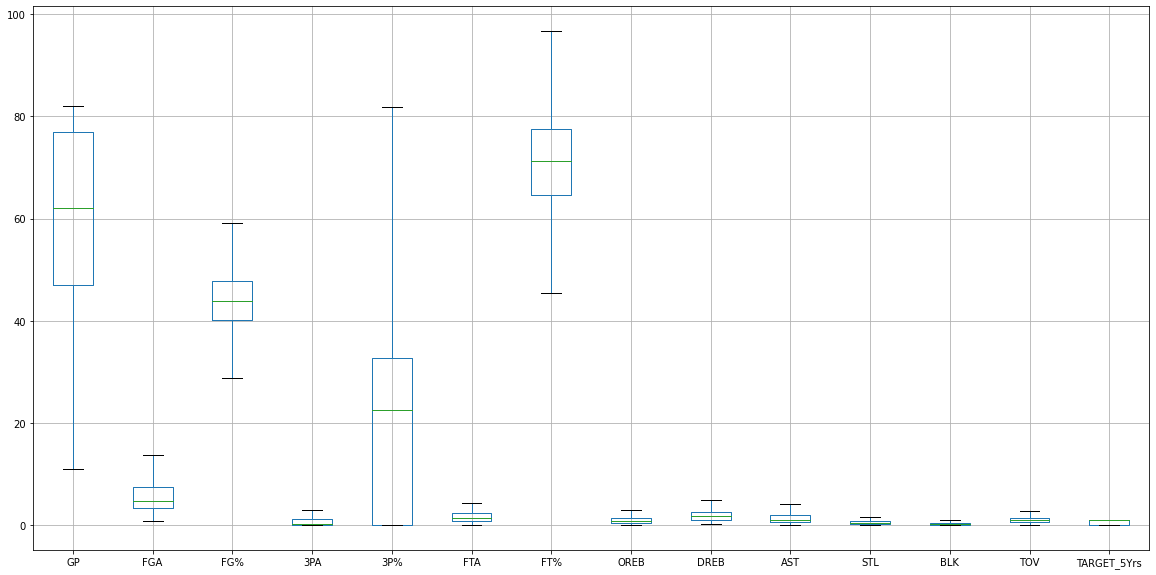

In [119]:
NBA_dataset.boxplot(figsize = (20,10), column = col)

## Standardising the dataset

Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one (unit variance). It standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation.

MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. 

In [120]:
#Standardising the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

NBA_dataset_standardised = sc.fit_transform(NBA_dataset.iloc[: ,:-1])
NBA_dataset_standardised

In [121]:
#Adding the column name to standardised dataset
NBA_dataset_standardised = pd.DataFrame(NBA_dataset_standardised, 
                                        columns = ['GP','FGA','FG%','3PA',
                                                   '3P%','FTA','FT%','OREB','DREB','AST',
                                                   'STL','BLK','TOV'])

In [122]:
#Resetting the index
NBA_dataset_standardised = NBA_dataset_standardised.reset_index(drop = True)
NBA_dataset['TARGET_5Yrs'] = NBA_dataset['TARGET_5Yrs'].reset_index(drop = True)

In [123]:
#Adding target column to standardised dataset
NBA_dataset_standardised['TARGET_5Yrs'] = NBA_dataset['TARGET_5Yrs']
NBA_dataset_standardised

GP 
 FGA 
 FG% 
 3PA 
 3P% 
 FTA 
 FT% 
 OREB 
 DREB 
 AST 
 STL 
 BLK 
 TOV 
 TARGET_5Yrs 
 
 
 
 
 0 
 0.000000 
 0.549947 
 -1.576571 
 1.477965 
 0.351494 
 0.508073 
 -0.054831 
 -0.405009 
 1.179961 
 0.405359 
 -0.548760 
 0.203532 
 0.213049 
 0.0 
 
 
 1 
 -1.464623 
 0.277674 
 -2.430302 
 2.237706 
 0.256372 
 1.511948 
 0.606984 
 -0.686301 
 0.020544 
 1.989360 
 1.323896 
 0.520845 
 0.677164 
 0.0 
 
 
 2 
 0.785682 
 -0.327378 
 -0.321084 
 1.043827 
 0.313445 
 -0.404540 
 -0.345628 
 -0.686301 
 -0.227903 
 -0.386641 
 -0.281238 
 -0.113782 
 -0.251067 
 0.0 
 
 
 3 
 -0.137520 
 -0.085357 
 -0.254125 
 -0.258587 
 0.199299 
 -0.404540 
 -0.155106 
 0.016929 
 -0.890427 
 -0.562641 
 -0.013716 
 -0.748408 
 -0.251067 
 1.0 
 
 
 4 
 -0.714521 
 -0.841672 
 1.386379 
 -0.692725 
 -1.233873 
 0.143028 
 -0.305518 
 0.016929 
 -0.393534 
 -1.002642 
 -0.816283 
 0.203532 
 -0.560478 
 1.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1289 
 1.131882 
 -0.660157 
 -0.136946 
 -0.584191 
 -0.327043 
 -0.222018 
 0.877726 
 -0.826947 
 -0.973243 
 0.933360 
 -0.013716 
 -0.431095 
 -0.560478 
 0.0 
 
 
 1290 
 0.439481 
 -0.508894 
 -1.392433 
 -0.041518 
 -0.174848 
 -0.678324 
 0.897781 
 -0.826947 
 -0.724796 
 0.757360 
 0.521329 
 -1.065721 
 0.213049 
 1.0 
 
 
 1291 
 -1.003022 
 -0.569399 
 1.821614 
 -0.801260 
 -1.233873 
 -0.130756 
 -0.616371 
 0.720160 
 0.268991 
 -1.002642 
 -0.816283 
 0.203532 
 -0.405773 
 0.0 
 
 
 1292 
 -0.483721 
 -0.599651 
 -0.036507 
 -0.584191 
 -0.599726 
 0.051766 
 -0.796866 
 -1.108239 
 -1.304505 
 0.669359 
 -0.548760 
 -0.748408 
 -0.560478 
 1.0 
 
 
 1293 
 -0.772221 
 -0.418136 
 -1.208295 
 0.609689 
 0.877836 
 -0.678324 
 -0.315546 
 -1.108239 
 -1.056058 
 -0.034641 
 0.253807 
 -0.748408 
 -0.405773 
 1.0 
 
 
 
 1294 rows × 14 columns

## Feature Importance

In [124]:
X = NBA_dataset_standardised.iloc[:, :-1].values
Y = NBA_dataset_standardised.iloc[:, -1].values

In [125]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, Y)
# get importance
importance = model.coef_[0]

df = pd.DataFrame()
df["Column"] = NBA_dataset_standardised.columns[:-1]
df["Coeff. Value"] = importance
print(df)

   Column  Coeff. Value
0      GP      0.606579
1     FGA      0.077200
2     FG%      0.166894
3     3PA     -0.099992
4     3P%      0.086335
5     FTA      0.182809
6     FT%      0.220859
7    OREB      0.498275
8    DREB     -0.178822
9     AST      0.304009
10    STL     -0.112890
11    BLK      0.186723
12    TOV     -0.098818


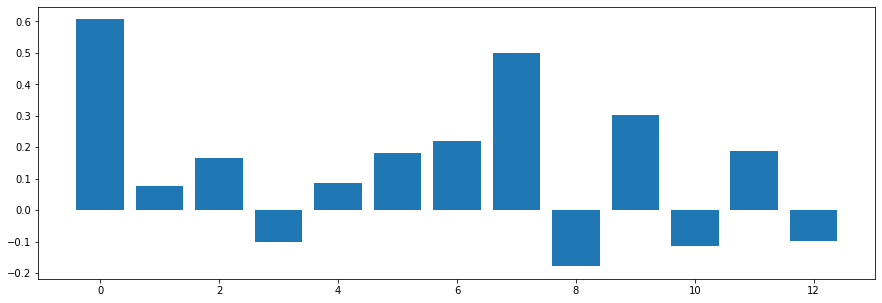

In [126]:
#Plotting feature importance
plt.figure(figsize=(15,5))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model. Recall that this is a classification problem with classes 0 and 1. Coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

# Model Building

## Splitting the dataset into training and test sets as per below conditions:

Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% \
Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90%

In [127]:
from sklearn.model_selection import train_test_split

#Case 1 with test size 20%
X_train_r_case1, X_test_r_case1, Y_train_r_case1, Y_test_r_case1 = train_test_split(X, Y, test_size = 0.2, random_state = 0)

X_train_case1 = np.c_[np.ones((X_train_r_case1.shape[0], 1)), X_train_r_case1]
X_test_case1 = np.c_[np.ones((X_test_r_case1.shape[0], 1)), X_test_r_case1]

Y_train_case1 = Y_train_r_case1[:, np.newaxis]
Y_test_case1 = Y_test_r_case1[:, np.newaxis]



#Case 2 with test size 90%
X_train_r_case2, X_test_r_case2, Y_train_r_case2, Y_test_r_case2 = train_test_split(X, Y, test_size = 0.9, random_state = 0)

X_train_case2 = np.c_[np.ones((X_train_r_case2.shape[0], 1)), X_train_r_case2]
X_test_case2 = np.c_[np.ones((X_test_r_case2.shape[0], 1)), X_test_r_case2]

Y_train_case2 = Y_train_r_case2[:, np.newaxis]
Y_test_case2 = Y_test_r_case2[:, np.newaxis]

## k-fold cross validation

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


k_fold_score = cross_val_score(LogisticRegression(), X, Y, cv=5)
print("K-Fold Cross Validation score with k = 5: \n\
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("Individual Accuracies: \n", [i for i in k_fold_score] ,"\n")
print("Accuracies: {:.2f}% \n".format(k_fold_score.mean()*100))
print("Standard Deviation: {:.2f} \n".format(k_fold_score.std()*100))


k_fold_score = cross_val_score(LogisticRegression(), X, Y, cv=10)
print("K-Fold Cross Validation score with k = 10: \n\
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("Individual Accuracies: \n", [i for i in k_fold_score] ,"\n")
print("Accuracies: {:.2f}% \n".format(k_fold_score.mean()*100))
print("Standard Deviation: {:.2f} \n".format(k_fold_score.std()*100))

K-Fold Cross Validation score with k = 5: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Individual Accuracies: 
 [0.6872586872586872, 0.7297297297297297, 0.694980694980695, 0.6988416988416989, 0.7054263565891473] 

Accuracies: 70.32% 

Standard Deviation: 1.45 

K-Fold Cross Validation score with k = 10: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Individual Accuracies: 
 [0.6615384615384615, 0.7076923076923077, 0.6846153846153846, 0.7615384615384615, 0.7364341085271318, 0.7209302325581395, 0.6821705426356589, 0.7286821705426356, 0.6976744186046512, 0.7209302325581395] 

Accuracies: 71.02% 

Standard Deviation: 2.80 



## Logistic Regression Model using gradient descent 

In [129]:
#Initialising Theta

Theta_train_case1 = np.zeros((X_train_case1.shape[1], 1))
Theta_test_case1 = np.zeros((X_test_case1.shape[1], 1))

Theta_train_case2 = np.zeros((X_train_case2.shape[1], 1))
Theta_test_case2 = np.zeros((X_test_case2.shape[1], 1))

In [130]:
def sigmoid(a):
    return 1.0 / (1 + np.exp(-a))

def cost(x, y, theta):
    m = x.shape[0]
    h = sigmoid(np.matmul(x, theta))
    cost = (np.matmul(-y.T, np.log(h)) - np.matmul((1 -y.T), np.log(1 - h)))/m
    return cost

def gradient_descent(theta, learning_rate, x , y):
    m = x.shape[0]
    h = sigmoid(np.matmul(x, theta))
    grad = np.matmul(x.T, (h - y)) / m
    J = cost(x, y, theta)
    theta = theta - learning_rate * grad * J
    return theta

def training_model_LR_GD(Theta, X_train, Y_train):
    n_iterations = 10000
    learning_rate = 0.05 # hyperparameter - fixed by trail and error methods

    # to store the cost values
    cost_history = []
    l1_loss_history = []
    l2_loss_history = []

    #Theta values
    Theta = np.zeros((X_train_case1.shape[1], 1))

    for i in range( n_iterations+1 ):
        Theta1 = gradient_descent(Theta, learning_rate, X_train, Y_train)

        J_new = cost(X_train, Y_train, Theta1)
        cost_history.append(J_new.flatten())
        Theta = Theta1
        # if i % 100 == 0:
        #     print('epoch = {}, cost = {}' .format(i, J_new))

    print('Training completed')
    return cost_history, Theta1

### Training & Prediction

In [131]:
cost_history_train_case1, Theta_train_case1 = training_model_LR_GD(Theta_train_case1, X_train_case1, Y_train_case1)
cost_history_test_case1, Theta_test_case1 = training_model_LR_GD(Theta_test_case1, X_test_case1, Y_test_case1)
cost_history_train_case2, Theta_train_case2 = training_model_LR_GD(Theta_train_case2, X_train_case2, Y_train_case2)
cost_history_test_case2, Theta_test_case2 = training_model_LR_GD(Theta_test_case2, X_test_case2, Y_test_case2)

Training completed
Training completed
Training completed
Training completed


In [132]:
# Case-1 train prediction data
h = sigmoid(np.matmul( X_train_case1, Theta_train_case1 )) 
Y_pred_train_case1 = (h > .5).astype(int)

# Case-1 test prediction data
h = sigmoid(np.matmul( X_test_case1, Theta_test_case1 )) 
Y_pred_test_case1 = (h > .5).astype(int)


# Case-2 train prediction data
h = sigmoid(np.matmul( X_train_case2, Theta_train_case2 )) 
Y_pred_train_case2 = (h > .5).astype(int)

# Case-2 test prediction data
h = sigmoid(np.matmul( X_test_case2, Theta_test_case2 )) 
Y_pred_test_case2 = (h > .5).astype(int)

### Loss Function for Logistics Regression 

L1 Loss function is used to minimize the error which is the sum of the all the absolute differences between the true value and the predicted value.

L2 Loss Function L2 Loss Function is used to minimize the error which is the sum of the all the squared differences between the true value and the predicted value.

The cost function of L1 and L2 can’t be used in Logistic Regression because it is a non-convex function of weights. Optimizing algorithms like i.e gradient descent only converge convex function into a global minimum.

Cost Function would be:

J = - ylog( h(x) ) - ( 1 - y )log( 1 - h(x) ) 

here, y is the real target value

and, h( x ) is sigmoid( wx + b )

### Plotting Losses for both test and train data

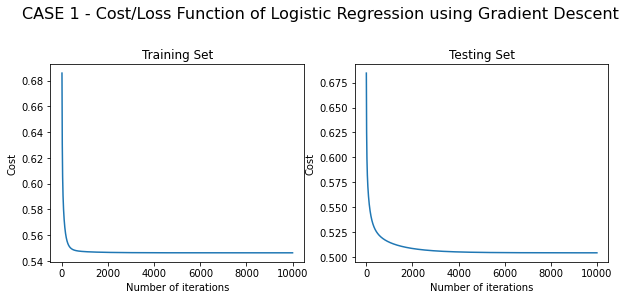

In [133]:
plt.figure(figsize=(10,8))
plt.suptitle('CASE 1 - Cost/Loss Function of Logistic Regression using Gradient Descent', fontsize=16)

plt.subplot(2,2,1)
plt.plot(cost_history_train_case1)
plt.title("Training Set")
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 

plt.subplot(2,2,2)
plt.plot(cost_history_test_case1)
plt.title("Testing Set")
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 

plt.show() 

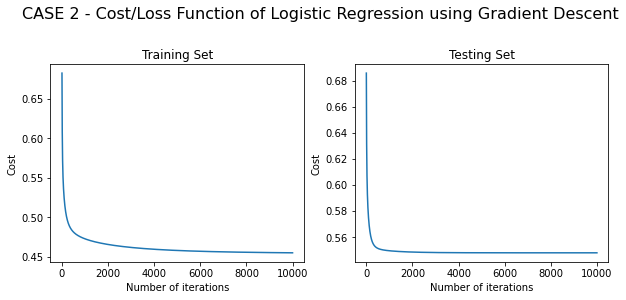

In [134]:
plt.figure(figsize=(10,8))
plt.suptitle('CASE 2 - Cost/Loss Function of Logistic Regression using Gradient Descent', fontsize=16)

plt.subplot(2,2,1)
plt.plot(cost_history_train_case2)
plt.title("Training Set")
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 

plt.subplot(2,2,2)
plt.plot(cost_history_test_case2)
plt.title("Testing Set")
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 

plt.show() 

### Comparing Accuracy of Train data with Test data

In [135]:
from sklearn.metrics import accuracy_score, roc_auc_score

print(" ==============  CASE 1  ==============")
print(" ====== Train = 80% & Test = 20% ======")
print(" ======================================\n")


print("Accuracy Score of Train data: {0:.2f}%".format(accuracy_score(Y_train_case1, Y_pred_train_case1)*100))
print("Accuracy Score of Test data: {0:.2f}%".format(accuracy_score(Y_test_case1, Y_pred_test_case1)*100))

print("\n\n ==============  CASE 2  ==============")
print(" ====== Train = 10% & Test = 90% ======")
print(" ======================================\n")

print("Accuracy Score of Train data: {0:.2f}%".format(accuracy_score(Y_train_case2, Y_pred_train_case2)*100))
print("Accuracy Score of Test data: {0:.2f}%".format(accuracy_score(Y_test_case2, Y_pred_test_case2)*100))

 ==============  CASE 1  ==============
 ====== Train = 80% & Test = 20% ======

Accuracy Score of Train data: 71.79%
Accuracy Score of Test data: 75.68%


 ==============  CASE 2  ==============
 ====== Train = 10% & Test = 90% ======

Accuracy Score of Train data: 79.07%
Accuracy Score of Test data: 72.70%


### Types of Gradient Descent

There are three types of gradient descent learning algorithms: batch gradient descent, stochastic gradient descent and mini-batch gradient descent.

1. Batch gradient descent
   
   Batch gradient descent sums the error for each point in a training set, updating the model only after all training examples have been evaluated. This process referred to as a training epoch.
    
    While this batching provides computation efficiency, it can still have a long processing time for large training datasets as it still needs to store all of the data into memory. Batch gradient descent also usually produces a stable error gradient and convergence, but sometimes that convergence point isn’t the most ideal, finding the local minimum versus the global one.

2. Stochastic gradient descent
   
   Stochastic gradient descent (SGD) runs a training epoch for each example within the dataset and it updates each training example's parameters one at a time. Since you only need to hold one training example, they are easier to store in memory. While these frequent updates can offer more detail and speed, it can result in losses in computational efficiency when compared to batch gradient descent. Its frequent updates can result in noisy gradients, but this can also be helpful in escaping the local minimum and finding the global one.

3. Mini-batch gradient descent
   
   Mini-batch gradient descent combines concepts from both batch gradient descent and stochastic gradient descent. It splits the training dataset into small batch sizes and performs updates on each of those batches. This approach strikes a balance between the computational efficiency of batch gradient descent and the speed of stochastic gradient descent.

### Logistic Regression using MLE

Logistic regression is a model for binary classification predictive modeling. The parameters of a logistic regression model can be estimated by the probabilistic framework called maximum likelihood estimation. Under this framework, a probability distribution for the target variable (class label) must be assumed and then a likelihood function defined that calculates the probability of observing the outcome given the input data and the model. This function can then be optimized to find the set of parameters that results in the largest sum likelihood over the training dataset.

The maximum likelihood approach to fitting a logistic regression model both aids in better understanding the form of the logistic regression model and provides a template that can be used for fitting classification models more generally. This is particularly true as the negative of the log-likelihood function used in the procedure can be shown to be equivalent to cross-entropy loss function.

Maximum Likelihood Estimation is a frequentist probabilistic framework that seeks a set of parameters for the model that maximizes a likelihood function. n Maximum Likelihood Estimation, we wish to maximize the conditional probability of observing the data (X) given a specific probability distribution and its parameters (theta), stated formally as:

                                     P(X ; theta)

Where X is, in fact, the joint probability distribution of all observations from the problem domain from 1 to n.

                                     P(x1, x2, x3, …, xn ; theta)

This resulting conditional probability is referred to as the likelihood of observing the data given the model parameters and written using the notation L() to denote the likelihood function. For example:

                                     L(X ; theta)

The joint probability distribution can be restated as the multiplication of the conditional probability for observing each example given the distribution parameters. Multiplying many small probabilities together can be unstable; as such, it is common to restate this problem as the sum of the log conditional probability.

                                     sum i to n log(P(xi ; theta))

Given the frequent use of log in the likelihood function, it is referred to as a log-likelihood function. It is common in optimization problems to prefer to minimize the cost function rather than to maximize it. Therefore, the negative of the log-likelihood function is used, referred to generally as a Negative Log-Likelihood (NLL) function.

                                     minimize -sum i to n log(P(xi ; theta))

The Maximum Likelihood Estimation framework can be used as a basis for estimating the parameters of many different machine learning models for regression and classification predictive modeling. This includes the logistic regression model.

## Regularization


Regularization is a technique used to reduce the errors by fitting the function appropriately on the given training set and avoid overfitting. Sometimes the machine learning model performs well with the training data but does not perform well with the test data. It means the model is not able to predict the output when deals with unseen data by introducing noise in the output, and hence the model is called overfitted. This problem can be deal with the help of a regularization technique.

There are mainly two types of regularization techniques, which are given below:

1. Ridge Regression
   
   Ridge regression is a regularization technique, which is used to reduce the complexity of the model. It is also called as L2 regularization. In this technique, the cost function is altered by adding the penalty term to it. The amount of bias added to the model is called Ridge Regression penalty.  It is also called as L2 regularization.

2. Lasso Regression
   
   It is similar to the Ridge Regression except that the penalty term contains only the absolute weights instead of a square of weights. Since it takes absolute values, hence, it can shrink the slope to 0, whereas Ridge Regression can only shrink it near to 0. It is also called as L1 regularization. 

    

In [136]:
from sklearn.model_selection import cross_val_score

#defining a generic Function to give ROC_AUC Scores in table format for better readability
def crossvalscore(model, X, y):
    scores = cross_val_score(model,X,y,cv=5,scoring='roc_auc',n_jobs=-1)
    acc = cross_val_score(model,X,y,cv=5,scoring='accuracy',n_jobs=-1)
    rand_scores = pd.DataFrame({
    'cv':range(1,6),
    'roc_auc score':scores,
    'accuracy score':acc
    })
    AUC = rand_scores['roc_auc score'].mean()
    ACC = rand_scores['accuracy score'].mean()
    print('AUC : ', AUC)
    print('Accuracy Score: ', ACC)
    return AUC, ACC

### L1 and L2 Regularisation

In [137]:
from sklearn.linear_model import LogisticRegression

print("+++++++++++++++++++++++++\n    L1 Regularisation\n+++++++++++++++++++++++++\n")

#Case 1
print("--- CASE 1 ---")
log_clf = LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear',random_state=42)
L1_reg_auc_case1, L1_reg_acc_case1 = crossvalscore(log_clf, X_train_r_case1, Y_train_r_case1)

#Case 2
print("\n--- CASE 2 ---")
log_clf = LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear',random_state=42)
L1_reg_auc_case2, L1_reg_acc_case2 = crossvalscore(log_clf, X_train_r_case2, Y_train_r_case2)


print("\n+++++++++++++++++++++++++\n    L2 Regularisation\n+++++++++++++++++++++++++\n")


#Case 1
print("--- CASE 1 ---")
log_clf = LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l2', solver= 'liblinear',random_state=42)
L2_reg_auc_case1, L2_reg_acc_case1 = crossvalscore(log_clf, X_train_r_case1, Y_train_r_case1)

#Case 2
print("\n--- CASE 2 ---")
log_clf = LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l2', solver= 'liblinear',random_state=42)
L2_reg_auc_case2, L2_reg_acc_case2 = crossvalscore(log_clf, X_train_r_case2, Y_train_r_case2)

+++++++++++++++++++++++++
    L1 Regularisation
+++++++++++++++++++++++++

--- CASE 1 ---
AUC :  0.7595961210344496
Accuracy Score:  0.6859903381642511

--- CASE 2 ---
AUC :  0.8009803921568628
Accuracy Score:  0.6975384615384617

+++++++++++++++++++++++++
    L2 Regularisation
+++++++++++++++++++++++++

--- CASE 1 ---
AUC :  0.763460609298295
Accuracy Score:  0.6995169082125604

--- CASE 2 ---
AUC :  0.7866013071895424
Accuracy Score:  0.728923076923077


### Compare models with and without regularization in a tabular format

In [138]:
#Getting Scores of Accuracy and AUC for WITHOUT Regularisation

WO_Reg_acc_case1 = accuracy_score(Y_train_case1, Y_pred_train_case1)
WO_Reg_acc_case2 = accuracy_score(Y_train_case2, Y_pred_train_case2)
WO_Reg_auc_case1 = roc_auc_score(Y_train_case1, Y_pred_train_case1)
WO_Reg_auc_case2 = roc_auc_score(Y_train_case2, Y_pred_train_case2)

In [139]:
warnings.filterwarnings('ignore')

!pip install tabulate 

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [140]:
from tabulate import tabulate

data1 = [ 
    ["Without Regularization", WO_Reg_acc_case1*100, WO_Reg_acc_case2*100],
    ["L1 Regularization", L1_reg_acc_case1*100, L1_reg_acc_case2*100],
    ["L2 Regularization", L2_reg_acc_case1*100, L2_reg_acc_case2*100]   
]

data2 = [ 
    ["Without Regularization", WO_Reg_auc_case1*100, WO_Reg_auc_case2*100],
    ["L1 Regularization", L1_reg_auc_case1*100, L1_reg_auc_case2*100],
    ["L2 Regularization", L2_reg_auc_case1*100, L2_reg_auc_case2*100]   
]

print("++++++++++++++++++++++++++++++++++++++++++++++\n              Accuracy Score\n++++++++++++++++++++++++++++++++++++++++++++++")
print(tabulate(data1 , headers=["", "Case 1", "Case 2"]))


print("\n\n++++++++++++++++++++++++++++++++++++++++++++++\n                  AUC\n++++++++++++++++++++++++++++++++++++++++++++++")
print(tabulate(data2 , headers=["", "Case 1", "Case 2"]))

++++++++++++++++++++++++++++++++++++++++++++++
              Accuracy Score
++++++++++++++++++++++++++++++++++++++++++++++
                          Case 1    Case 2
----------------------  --------  --------
Without Regularization   71.7874   79.0698
L1 Regularization        68.599    69.7538
L2 Regularization        69.9517   72.8923


++++++++++++++++++++++++++++++++++++++++++++++
                  AUC
++++++++++++++++++++++++++++++++++++++++++++++
                          Case 1    Case 2
----------------------  --------  --------
Without Regularization   67.8046   75
L1 Regularization        75.9596   80.098
L2 Regularization        76.3461   78.6601


Regularization did not improve the Accuracy Score as the accuracy score for without regularisation is more than the accuracy score for L1 or L2 regularisation. And, AUC is more in L1/L2 regularisation than without regularisation. 

Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. We could see that AUC for Case-2 is more than Case-1; therefore, we could say that Case-2 model is more apt than Case-1 model for prediction.

# Performance Evaluation

## Prediction Performance

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def accuracy(y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix : \n", cm, '\n')
    print("Accuracy Score : {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))
    print("Precision : {0:.2f}".format(precision_score(y_test, y_pred)))
    print("Recall : {0:.2f}".format(recall_score(y_test, y_pred)))
    print("F1 Score : {0:.2f}".format(f1_score(y_test, y_pred)))

### Prediction Performance Analysis with Case-1 Test data 

In [142]:
print("=============================================================\n   \
      CASE - 1 | Prediction Evaluation metrics\n\
=============================================================\n") 
print("++++++++++++++++++\nTest Set Accuracy: \n++++++++++++++++++")
accuracy(Y_pred_test_case1, Y_test_case1)
print("\n\n++++++++++++++++++\nTrain Set Accuracy: \n++++++++++++++++++")
accuracy(Y_pred_train_case1, Y_train_case1)

         CASE - 1 | Prediction Evaluation metrics

++++++++++++++++++
Test Set Accuracy: 
++++++++++++++++++
Confusion Matrix : 
 [[ 74  32]
 [ 31 122]] 

Accuracy Score : 75.68%
Precision : 0.79
Recall : 0.80
F1 Score : 0.79


++++++++++++++++++
Train Set Accuracy: 
++++++++++++++++++
Confusion Matrix : 
 [[201 182]
 [110 542]] 

Accuracy Score : 71.79%
Precision : 0.75
Recall : 0.83
F1 Score : 0.79


### Prediction Performance Analysis with Case-2 Test data 

In [143]:
print("\n =============================================================\n  \
      CASE - 2 | Prediction Evaluation metrics \n \
=============================================================\n") 
print("++++++++++++++++++\nTest Set Accuracy: \n++++++++++++++++++")
accuracy(Y_pred_test_case2, Y_test_case2)
print("\n\n++++++++++++++++++\nTrain Set Accuracy: \n++++++++++++++++++")
accuracy(Y_pred_train_case2, Y_train_case2)


        CASE - 2 | Prediction Evaluation metrics 

++++++++++++++++++
Test Set Accuracy: 
++++++++++++++++++
Confusion Matrix : 
 [[251 195]
 [123 596]] 

Accuracy Score : 72.70%
Precision : 0.75
Recall : 0.83
F1 Score : 0.79


++++++++++++++++++
Train Set Accuracy: 
++++++++++++++++++
Confusion Matrix : 
 [[27 16]
 [11 75]] 

Accuracy Score : 79.07%
Precision : 0.82
Recall : 0.87
F1 Score : 0.85


1. Case 1 (Train = 80 % Test = 20%)

    Accuracy of Training set is 71.79% and Accuracy for Test set is 75.68%. 
    We could say that the case-1 model is **underfit**. 

2. Case 2 (Train = 10 % Test = 90%)

    Accuracy of Training set is 79.07% and Accuracy for Test set is 72.70%. 
    We could say that the case-2 model is **overfit**.
